In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import requests
import json
from IPython.display import IFrame

In [35]:
streeteasy = 'scraped_streeteasy.csv'
streeteasy_df = pd.read_csv(streeteasy)
streeteasy_df.head()

,Title,Title_link,Price,first_detail_cell,Location,last_detail_cell,detail_cell,Headline,Borough
0,29-11 Queens Plaza North #G328,https://streeteasy.com/building/aurora-29_11-q...,"$5,995",3 beds,Rental Unit in Long Island City,2 baths,NaN,29-11 Queens Plaza North #G328 in Long Island ...,Queens
1,736 Washington Avenue #2F,https://streeteasy.com/building/736-washington...,"$3,000",2 beds,Rental Unit in Prospect Heights,1 bath,NaN,"736 Washington Avenue #2F in Prospect Heights,...",Brooklyn
2,60 Jefferson Street #3F,https://streeteasy.com/building/60-jefferson-s...,"$2,395",1 bed,Building in Bushwick,1 bath,NaN,"60 Jefferson Street #3F in Bushwick, Brooklyn ...",Brooklyn
3,319 W 116th Street #5D,https://streeteasy.com/building/319-west-116-s...,"$2,850",2 beds,Rental Unit in South Harlem,1 bath,NaN,"319 W 116th Street #5D in South Harlem, Manhat...",Manhattan
4,25 Fayette Street #3R,https://streeteasy.com/building/25-fayette-str...,"$3,116",3 beds,Building in Bushwick,2 baths,NaN,"25 Fayette Street #3R in Bushwick, Brooklyn | ...",Brooklyn


In [36]:
total_listings_on_file = len(streeteasy_df)
print(f"The total listings in NYC is {total_listings_on_file}.")

The total listings in NYC is 100.


In [37]:
streeteasy_df.columns

Index(['Title', 'Title_link', 'Price', 'first_detail_cell', 'Location',
       'last_detail_cell', 'detail_cell', 'Headline', 'Borough'],
      dtype='object')

In [38]:
streeteasy_df['Price'] = streeteasy_df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
streeteasy_cleaned = streeteasy_df.loc[:, ["Title", "Price", "first_detail_cell", "Location","last_detail_cell","Borough"]]
streeteasy_cleaned.head()

,Title,Price,first_detail_cell,Location,last_detail_cell,Borough
0,29-11 Queens Plaza North #G328,5995.0,3 beds,Rental Unit in Long Island City,2 baths,Queens
1,736 Washington Avenue #2F,3000.0,2 beds,Rental Unit in Prospect Heights,1 bath,Brooklyn
2,60 Jefferson Street #3F,2395.0,1 bed,Building in Bushwick,1 bath,Brooklyn
3,319 W 116th Street #5D,2850.0,2 beds,Rental Unit in South Harlem,1 bath,Manhattan
4,25 Fayette Street #3R,3116.0,3 beds,Building in Bushwick,2 baths,Brooklyn


In [39]:
num_by_borough = pd.DataFrame(streeteasy_cleaned["Borough"].value_counts())
num_by_borough.rename(columns={"Borough": "Number of Listings"})

,Number of Listings
Manhattan,40
Brooklyn,32
Queens,16
Bronx,12


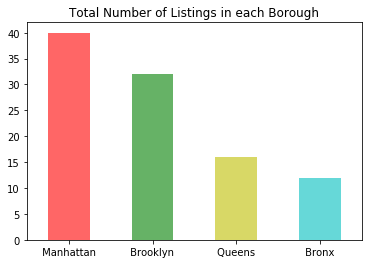

In [40]:
# bar chart: total number of Streeteasy in each borough
num_by_borough.plot.bar(color = "rgycm", alpha = 0.6)
plt.xticks(rotation = 0)
plt.legend().remove()
plt.title("Total Number of Listings in each Borough")
plt.show()

In [41]:
#Average Price NYC
avg_price = round(streeteasy_cleaned["Price"].mean(), 2)
#sd_price = round(np.std(organized_df["price"]), 2)
print(f"The average price of Streeteasy in NYC is: ${avg_price}.")

The average price of Streeteasy in NYC is: $3389.75.


In [46]:
# Average Price in each borough
average_price = streeteasy_df.groupby("Borough")["Price"].mean()
average_price = pd.DataFrame(average_price)
average_price = average_price.reindex(["Manhattan", "Brooklyn", "Queens", "Bronx"])
average_price

,Price
Borough,
Manhattan,NaN
Brooklyn,NaN
Queens,NaN
Bronx,NaN


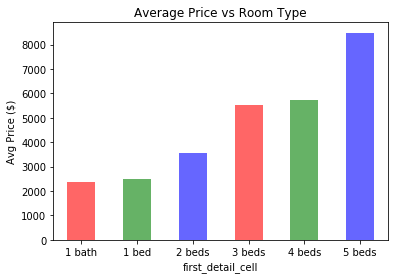

In [43]:
room_type_price = pd.DataFrame(streeteasy_cleaned.groupby("first_detail_cell")["Price"].mean())

room_type_price.plot.bar(color = "rgb", alpha = 0.6)
plt.xticks(rotation = "0")
plt.ylabel("Avg Price ($)")
plt.legend().remove()
plt.title("Average Price vs Room Type")
plt.show()

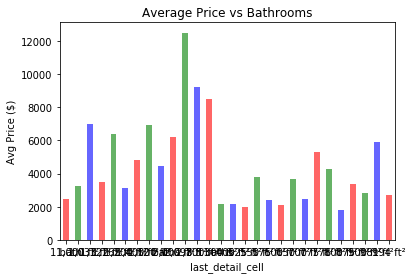

In [44]:
bathroom_price = pd.DataFrame(streeteasy_cleaned.groupby("last_detail_cell")["Price"].mean())

bathroom_price.plot.bar(color = "rgb", alpha = 0.6)
plt.xticks(rotation = "0")
plt.ylabel("Avg Price ($)")
plt.legend().remove()
plt.title("Average Price vs Bathrooms")
plt.show()